In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stats
import xgboost as xgb

### Exploratory Data Analysis (EDA):

In [3]:
### Load the Titanic dataset using Python's pandas library.

In [4]:
df=pd.read_csv("Titanic_train.csv")
df1=pd.read_csv("Titanic_test.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
## Check for missing values.

In [8]:
df.isnull().sum()     # For Training Data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df1.isnull().sum()      # For Testing Data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
## Explore data distributions using histograms and box plots.

<Figure size 3000x1000 with 0 Axes>

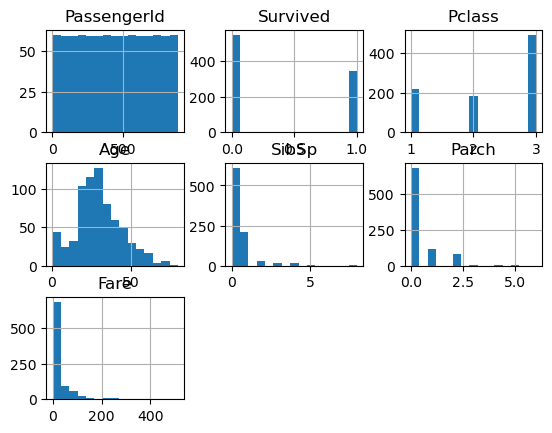

In [11]:
def hist(df,columns):
    plt.figure(figsize=(30,10))
    df.hist(bins=15)
    plt.show()
hist(df,df.columns)           ## For Training Data

<Figure size 3000x1000 with 0 Axes>

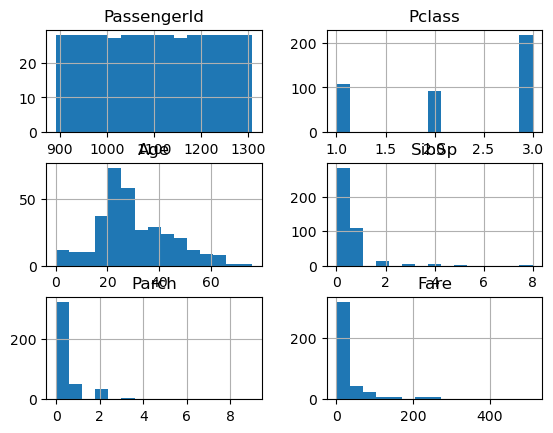

In [12]:
hist(df1,df1.columns)    ## For Testing Data

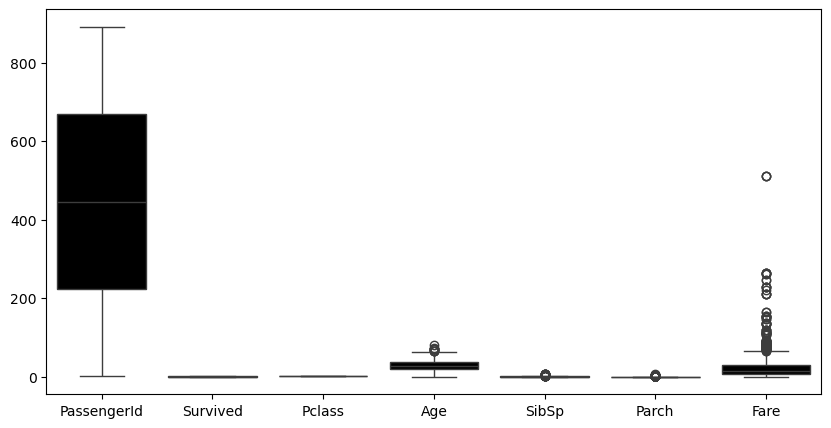

In [13]:
def box_plot(df,columns):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,color='black')       ## For Training Data
    plt.show()
box_plot(df,df.columns)

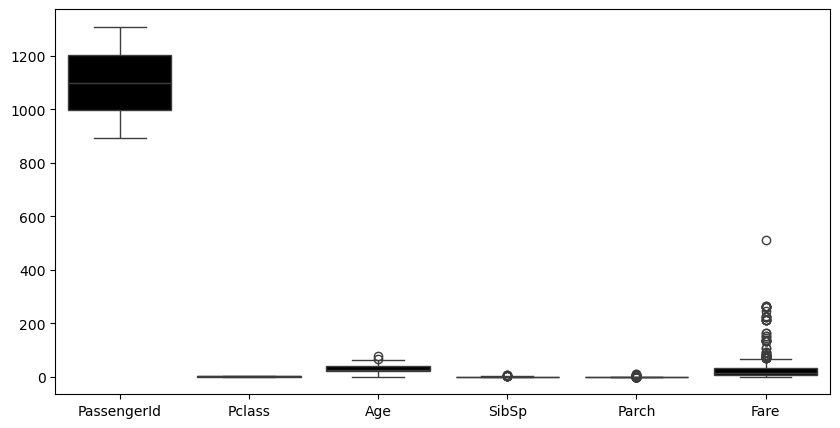

In [14]:
box_plot(df1,df1.columns)     ### For testing data

In [15]:
#### Visualize relationships between features and survival using scatter plots and bar plots.

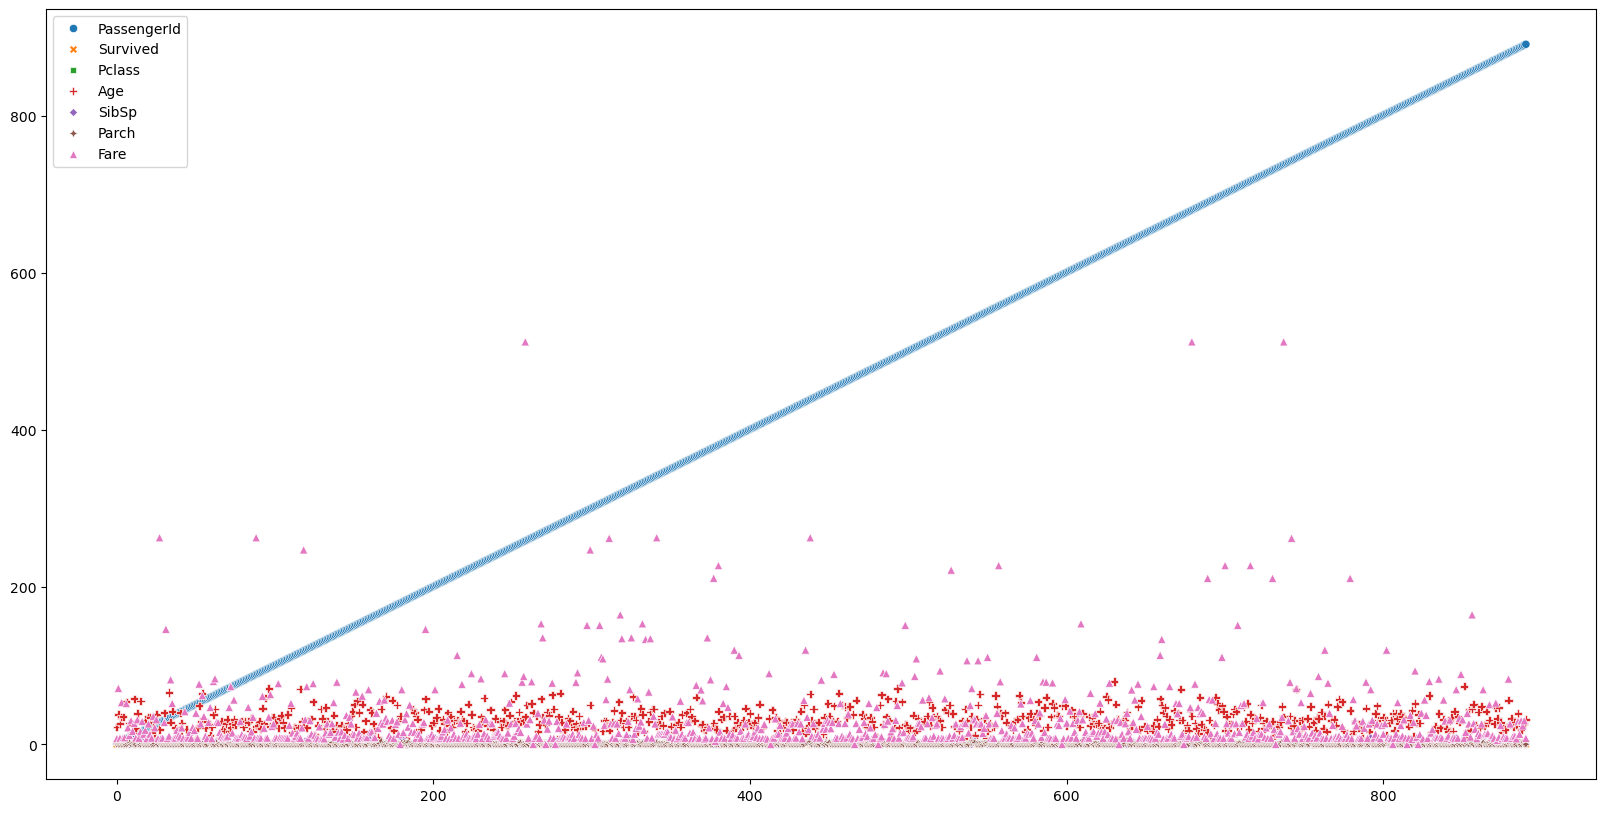

In [16]:
def scatter(df,columns):
    plt.figure(figsize=(20,10))            ## For Trained data
    sns.scatterplot(data=df)
    plt.show()
scatter(df,df.columns)

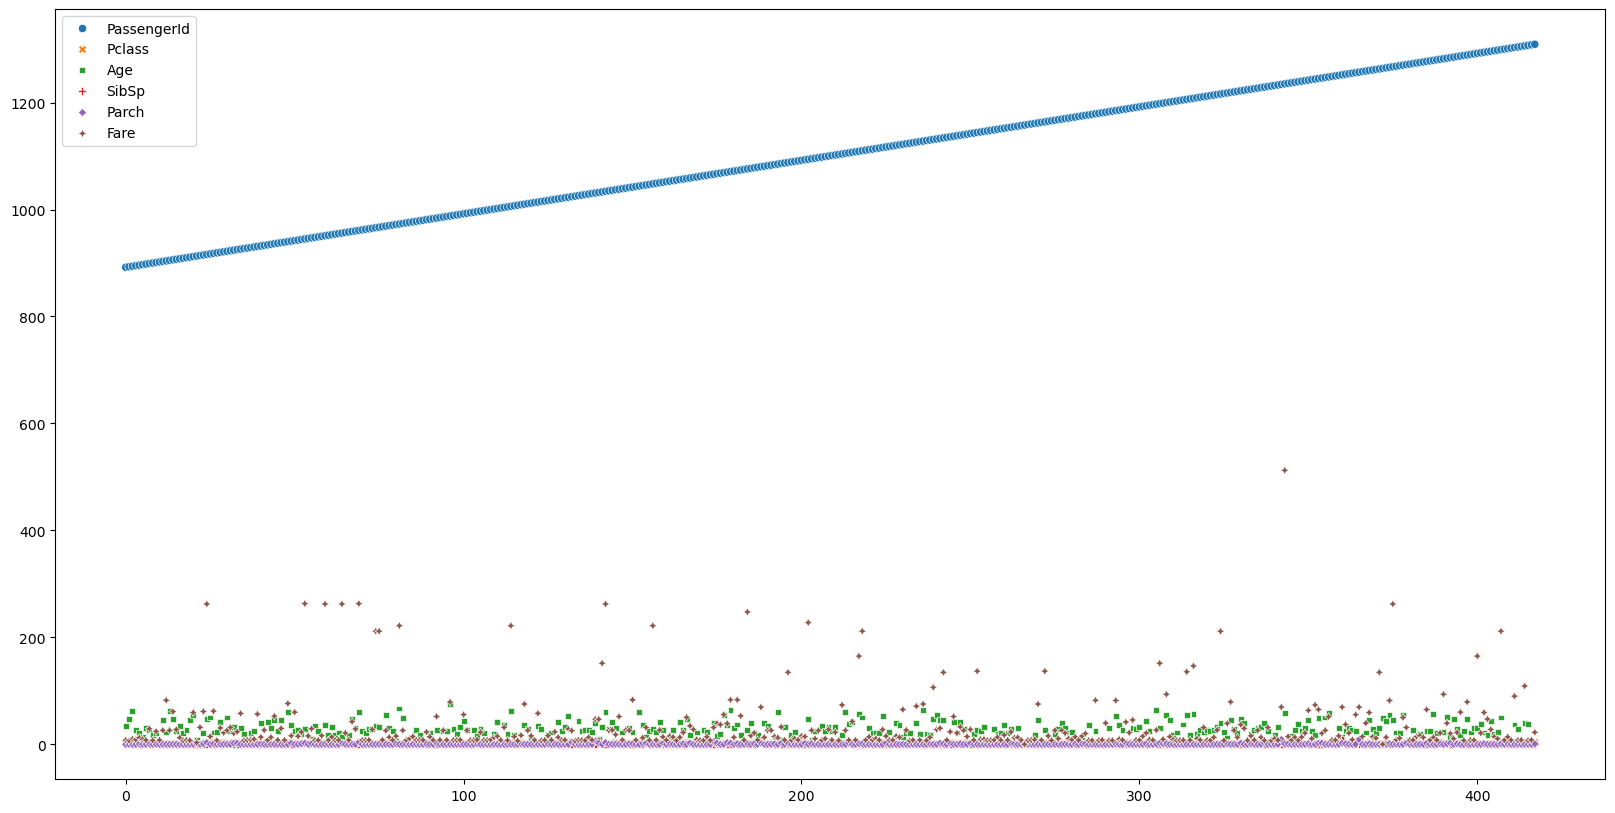

In [17]:
scatter(df1,df1.columns)

In [18]:
def bar(df,columns):
    plt.figure(figsize=(20,10))
    sns.barplot(df,color='blue')
    plt.show()

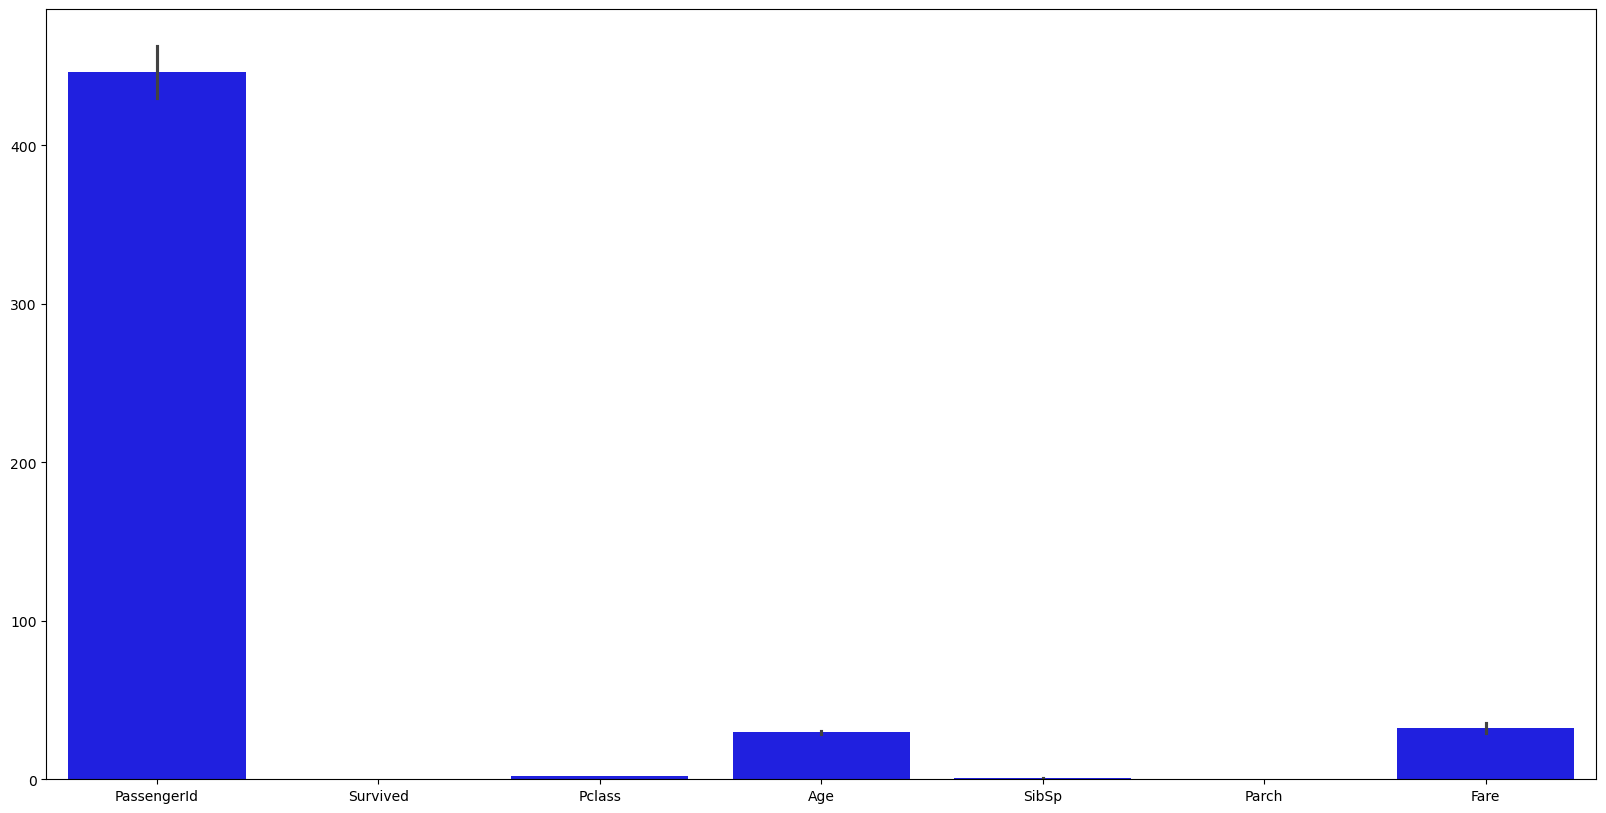

In [19]:
 bar(df,df.columns)      ## For Trained data

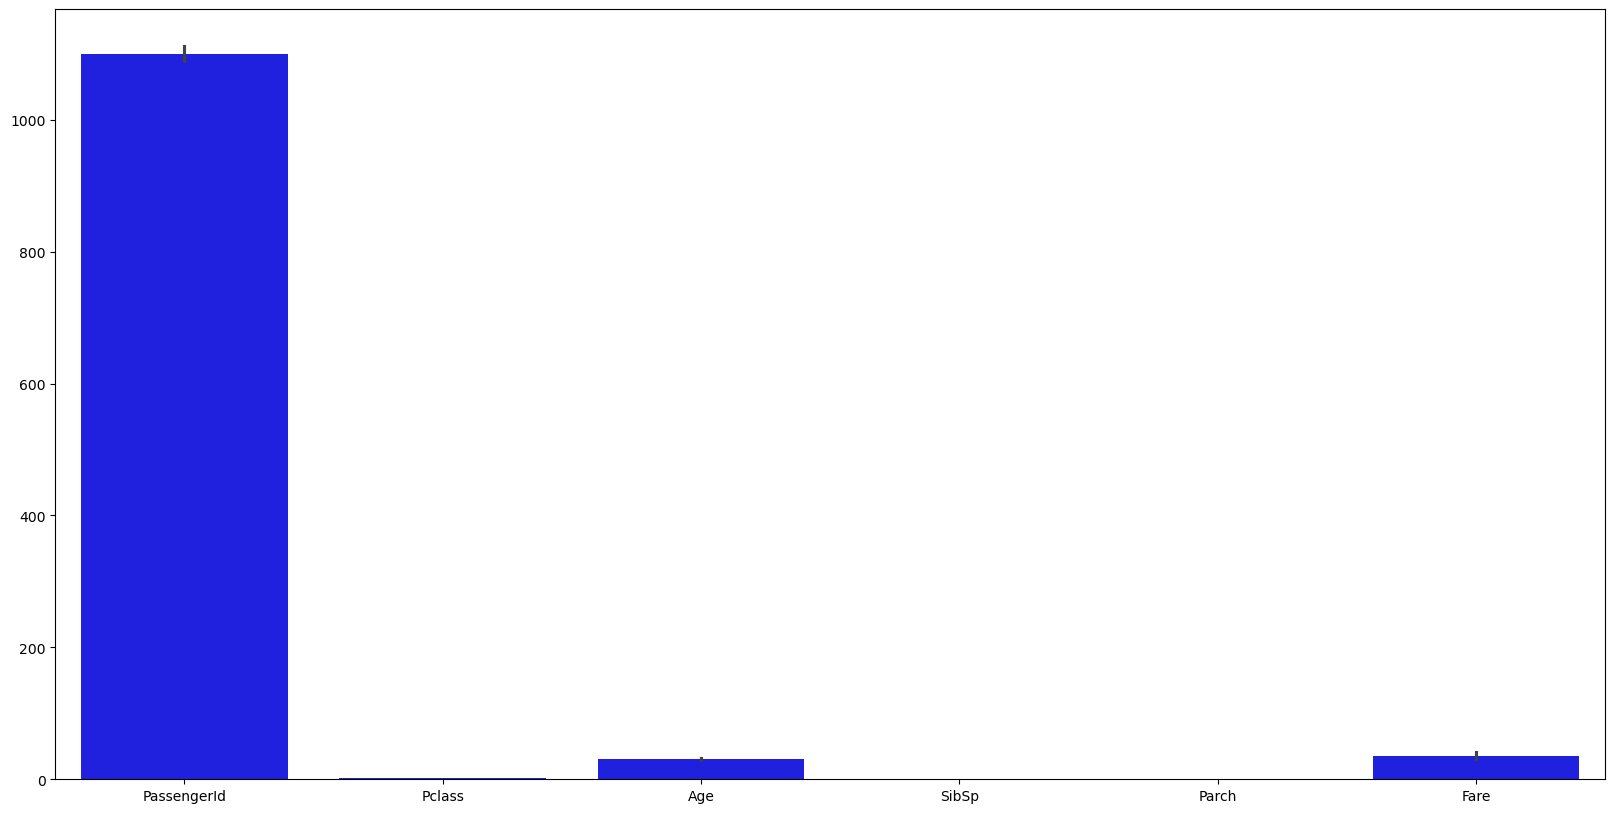

In [20]:
bar(df1,df1.columns)

## Data Preprocessing:

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
df.drop(columns=['Name','Cabin','Ticket'],inplace=True)

In [26]:
df1.drop(columns=['Name','Cabin','Ticket'],inplace=True)

In [27]:
features=df.drop(columns='Survived')
target=df['Survived']

In [28]:
### 2.	Encode categorical variables 

In [29]:
cat_col=[i for i in features.columns if features[i].dtype=='O']
num_col=[i for i in features.columns if features[i].dtype!='O']

In [30]:
def ord(df,cat_col):
    ord=make_pipeline(OrdinalEncoder())
    Trans=ColumnTransformer([('ord',ord,cat_col)])
    return pd.DataFrame(Trans.fit_transform(df[cat_col]),columns=Trans.get_feature_names_out())

In [31]:
df3=ord(features,cat_col) ## For Trained Data
df3

,ord__Sex,ord__Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
886,1.0,2.0
887,0.0,2.0
888,0.0,2.0
889,1.0,0.0


In [32]:
df1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [33]:
cat_col1=[i for i in df1.columns if df1[i].dtype=='O']
num_col1=[i for i in df1.columns if df1[i].dtype!='O']
df1[cat_col1]

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [34]:
df2=ord(df1,cat_col1)   
df2                                ## For Test Data

,ord__Sex,ord__Embarked
0,1.0,1.0
1,0.0,2.0
2,1.0,1.0
3,1.0,2.0
4,0.0,2.0
...,...,...
413,1.0,2.0
414,0.0,0.0
415,1.0,2.0
416,1.0,2.0


In [35]:
### Missing Values

In [36]:
df3.isnull().sum()

ord__Sex         0
ord__Embarked    2
dtype: int64

In [37]:
df2.isnull().sum()

ord__Sex         0
ord__Embarked    0
dtype: int64

In [38]:
def miss(df):
    sim=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    return pd.DataFrame(sim.fit_transform(df),columns=df.columns)

In [39]:
df4=miss(df3)            ## For Trained Data

In [40]:
df4.isnull().sum()

ord__Sex         0
ord__Embarked    0
dtype: int64

In [41]:
df2=miss(df2)   
df2                  ## Fir Test data

,ord__Sex,ord__Embarked
0,1.0,1.0
1,0.0,2.0
2,1.0,1.0
3,1.0,2.0
4,0.0,2.0
...,...,...
413,1.0,2.0
414,0.0,0.0
415,1.0,2.0
416,1.0,2.0


In [42]:
df2.isnull().sum()

ord__Sex         0
ord__Embarked    0
dtype: int64

In [43]:
def miss1(df):
    sim=SimpleImputer(missing_values=np.nan,strategy='median')
    return pd.DataFrame(sim.fit_transform(df),columns=df.columns)

In [44]:
num=miss(features[num_col])  
num                       ### For Trained Data

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,887.0,2.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,19.0,0.0,0.0,30.0000
888,889.0,3.0,24.0,1.0,2.0,23.4500
889,890.0,1.0,26.0,0.0,0.0,30.0000


In [45]:
num.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [46]:
num1=miss(df1[num_col1])
num1                                          ### For Test Data

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892.0,3.0,34.5,0.0,0.0,7.8292
1,893.0,3.0,47.0,1.0,0.0,7.0000
2,894.0,2.0,62.0,0.0,0.0,9.6875
3,895.0,3.0,27.0,0.0,0.0,8.6625
4,896.0,3.0,22.0,1.0,1.0,12.2875
...,...,...,...,...,...,...
413,1305.0,3.0,21.0,0.0,0.0,8.0500
414,1306.0,1.0,39.0,0.0,0.0,108.9000
415,1307.0,3.0,38.5,0.0,0.0,7.2500
416,1308.0,3.0,21.0,0.0,0.0,8.0500


In [47]:
num1.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [48]:
df=pd.concat([num,df4],axis=1)
df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,ord__Sex,ord__Embarked
0,1.0,3.0,22.0,1.0,0.0,7.2500,1.0,2.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0.0,2.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,0.0,2.0
4,5.0,3.0,35.0,0.0,0.0,8.0500,1.0,2.0
...,...,...,...,...,...,...,...,...
886,887.0,2.0,27.0,0.0,0.0,13.0000,1.0,2.0
887,888.0,1.0,19.0,0.0,0.0,30.0000,0.0,2.0
888,889.0,3.0,24.0,1.0,2.0,23.4500,0.0,2.0
889,890.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0


In [49]:
df.isnull().sum()

PassengerId      0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
ord__Sex         0
ord__Embarked    0
dtype: int64

In [50]:
df1=pd.concat([num1,df2],axis=1)

In [51]:
df1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,ord__Sex,ord__Embarked
0,892.0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,0.0,2.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,1.0,1.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,1.0,2.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,0.0,2.0
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,21.0,0.0,0.0,8.0500,1.0,2.0
414,1306.0,1.0,39.0,0.0,0.0,108.9000,0.0,0.0
415,1307.0,3.0,38.5,0.0,0.0,7.2500,1.0,2.0
416,1308.0,3.0,21.0,0.0,0.0,8.0500,1.0,2.0


In [52]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
ord__Sex         0
ord__Embarked    0
dtype: int64

In [53]:
#### 3.	If needed you can apply more preprocessing methods on the given dataset.

In [54]:
df.duplicated().sum()

0

In [55]:
df1.duplicated().sum()

0

In [56]:
def box(df,columns):
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df)
    plt.show()

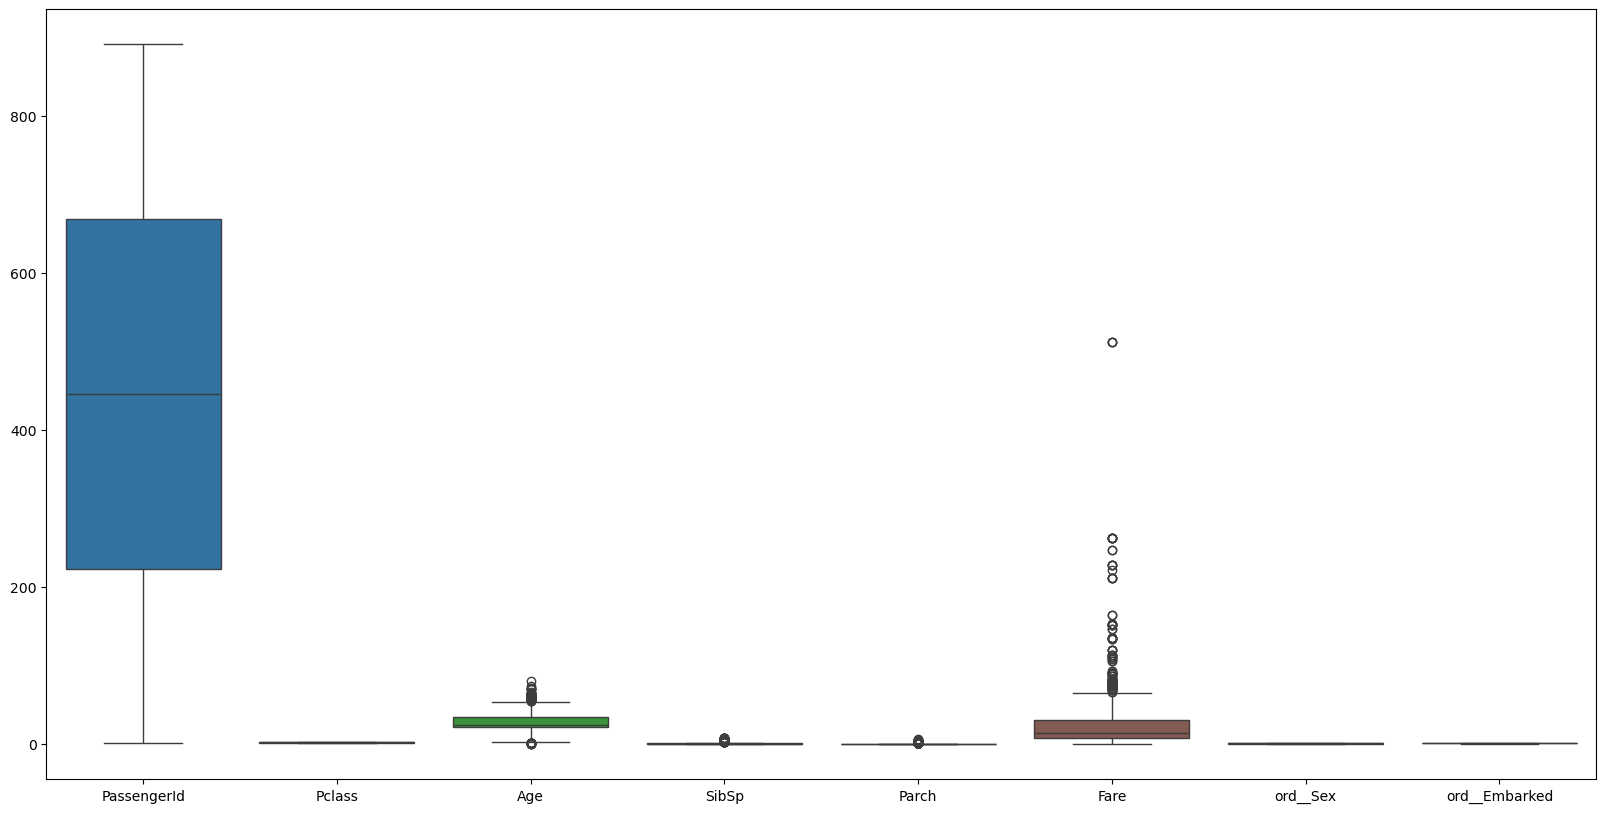

In [57]:
box(df,df.columns)     ## For Trained Data

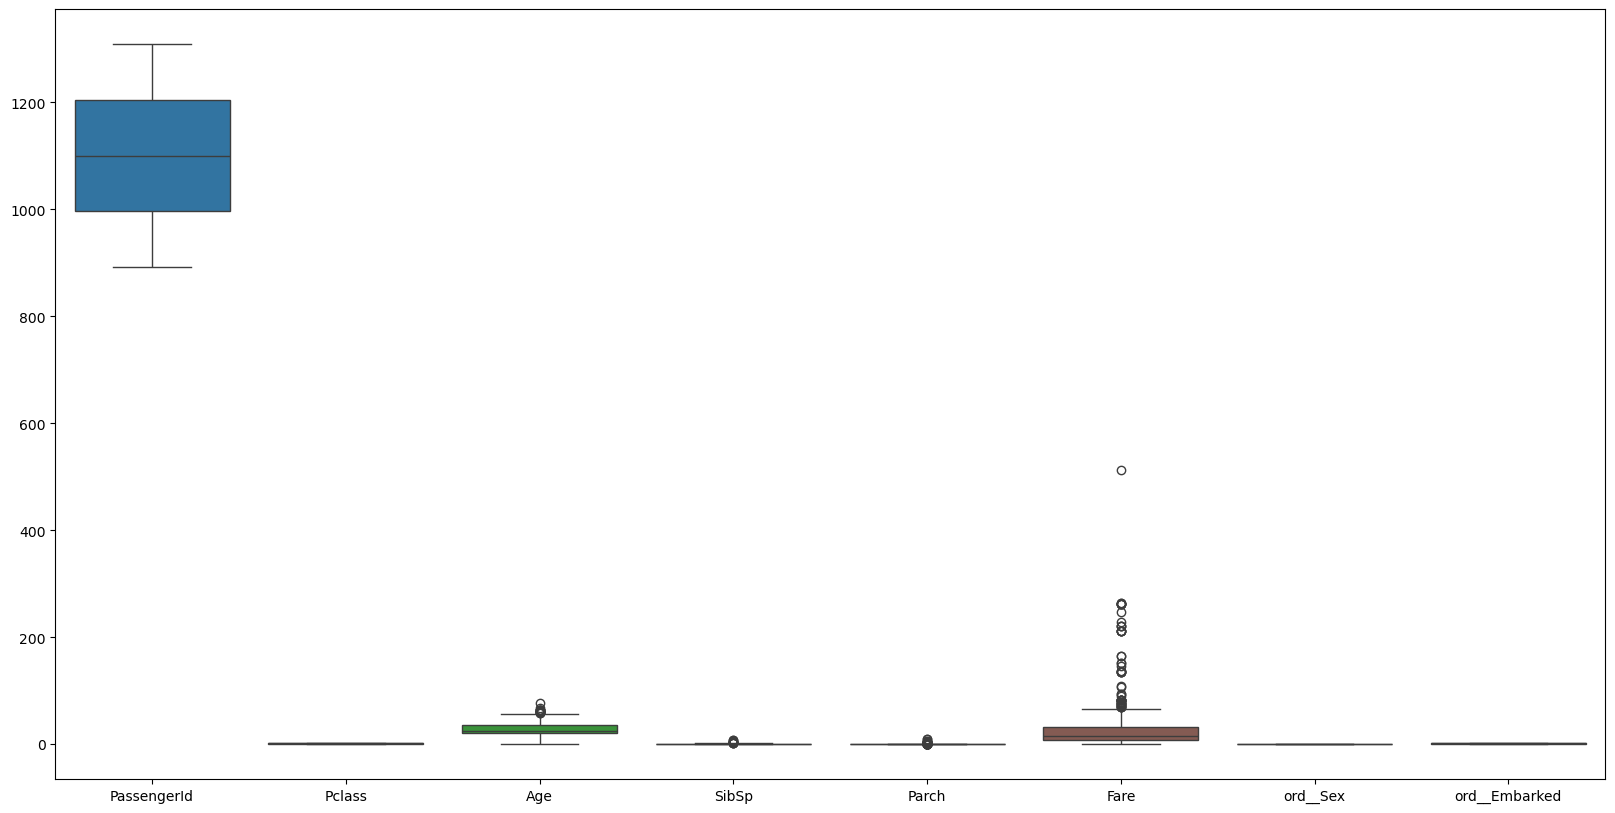

In [58]:
box(df1,df1.columns)     ## For Test Data

In [59]:
def o_r(df,columns):
    thres=2
    z_score=stats.zscore(df[columns])
    return df[(abs(z_score)<thres).all(axis=1)]

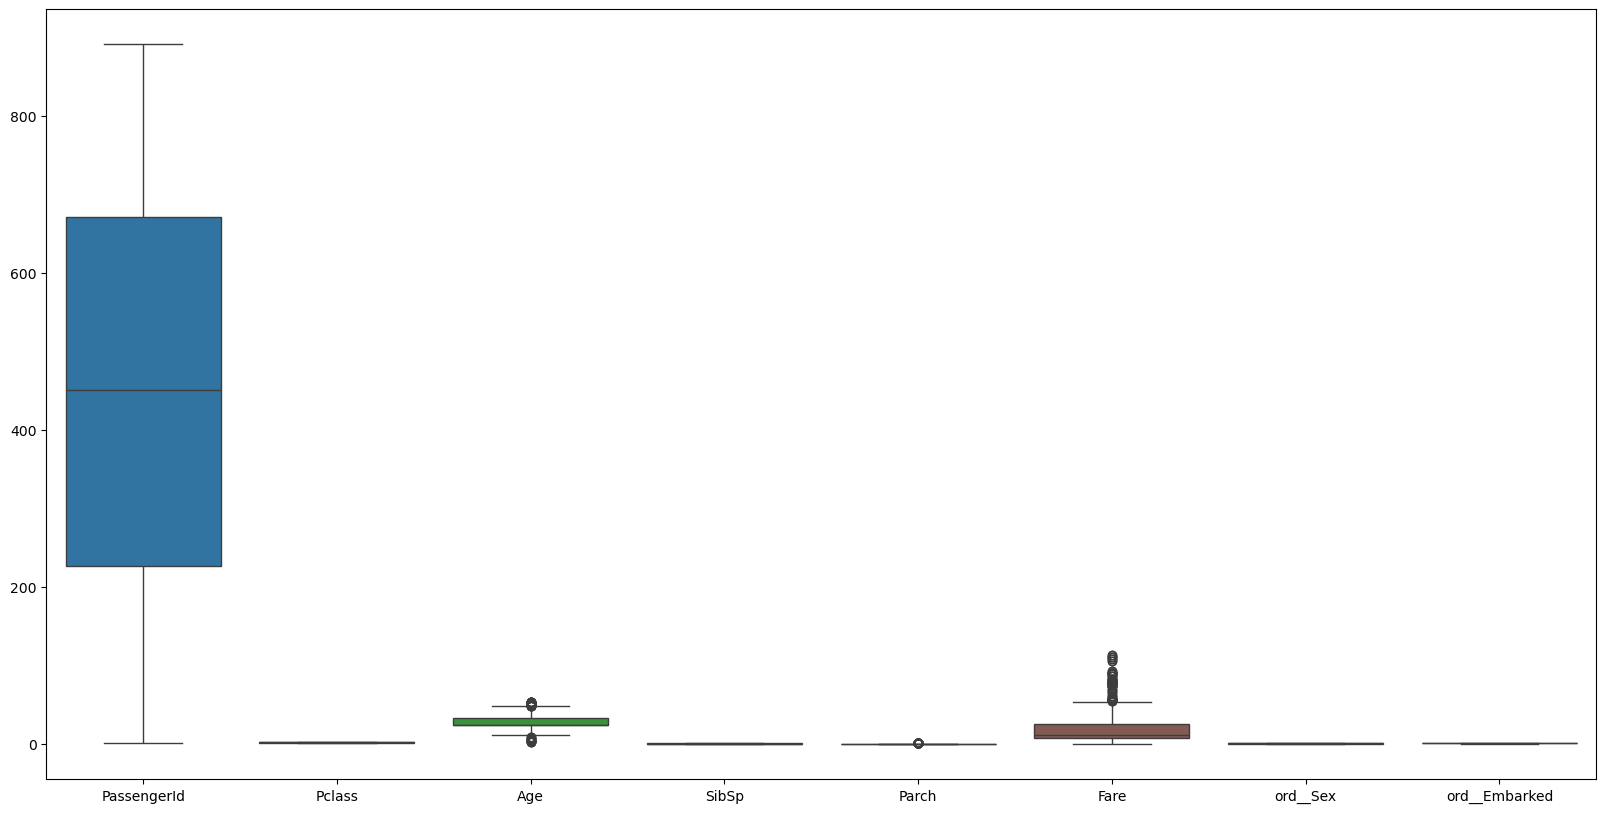

None


,PassengerId,Pclass,Age,SibSp,Parch,Fare,ord__Sex,ord__Embarked
0,1.0,3.0,22.0,1.0,0.0,7.2500,1.0,2.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0.0,2.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,0.0,2.0
4,5.0,3.0,35.0,0.0,0.0,8.0500,1.0,2.0
...,...,...,...,...,...,...,...,...
884,885.0,3.0,25.0,0.0,0.0,7.0500,1.0,2.0
886,887.0,2.0,27.0,0.0,0.0,13.0000,1.0,2.0
887,888.0,1.0,19.0,0.0,0.0,30.0000,0.0,2.0
889,890.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0


In [60]:
df=o_r(df,df.columns)  
print(box(df,df.columns))
df                                              ### For Trained Data

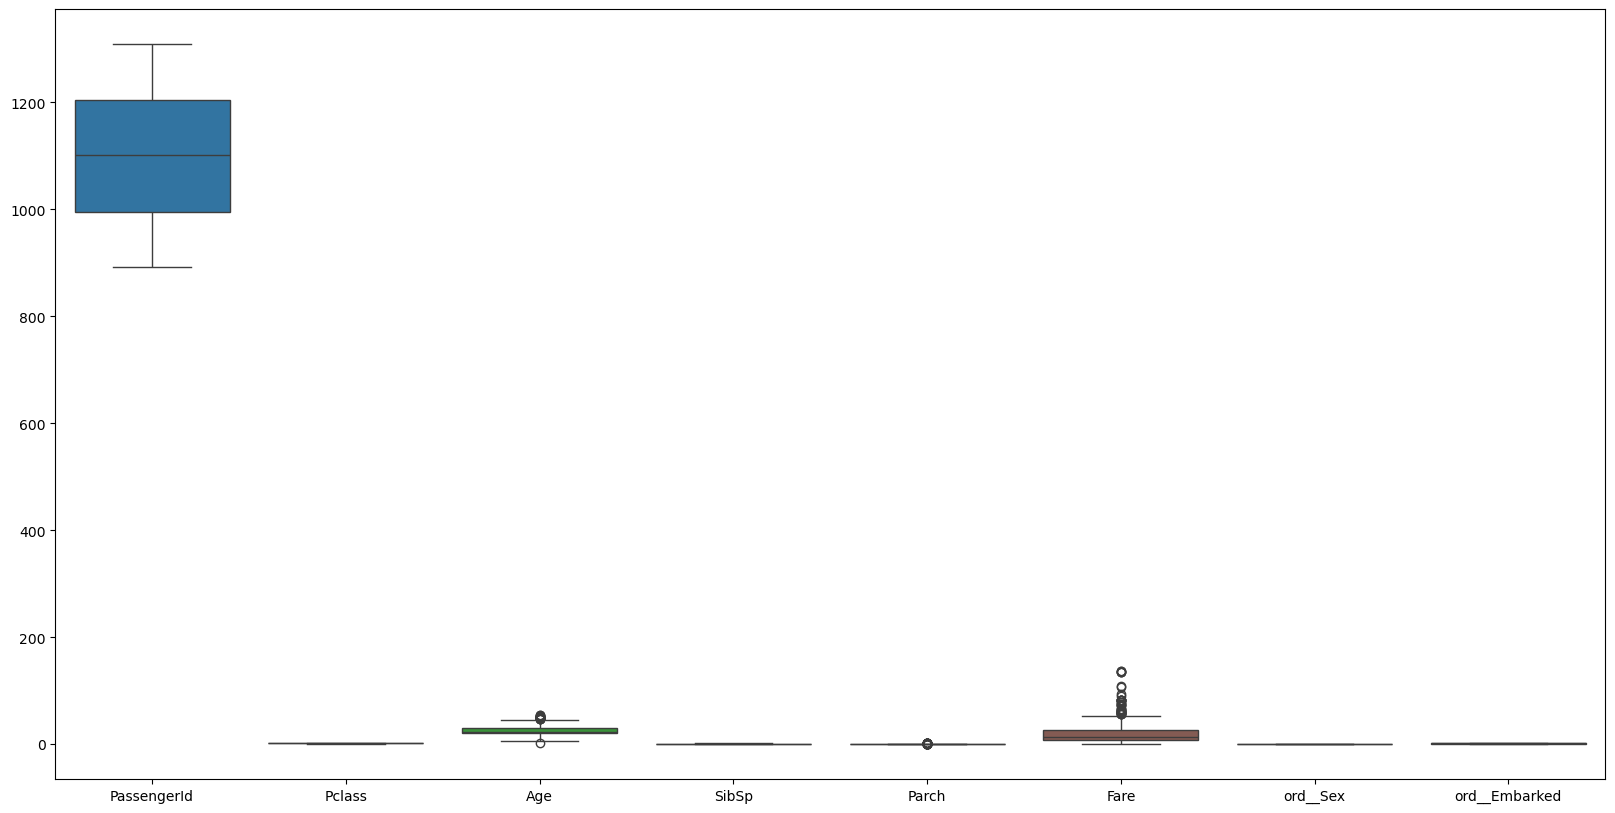

None


,PassengerId,Pclass,Age,SibSp,Parch,Fare,ord__Sex,ord__Embarked
0,892.0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,0.0,2.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,1.0,2.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,0.0,2.0
5,897.0,3.0,14.0,0.0,0.0,9.2250,1.0,2.0
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,21.0,0.0,0.0,8.0500,1.0,2.0
414,1306.0,1.0,39.0,0.0,0.0,108.9000,0.0,0.0
415,1307.0,3.0,38.5,0.0,0.0,7.2500,1.0,2.0
416,1308.0,3.0,21.0,0.0,0.0,8.0500,1.0,2.0


In [61]:
df1=o_r(df1,df1.columns)
print(box(df1,df1.columns))          #### For Test Data
df1

### Building Predictive Models:

In [63]:
## Split the preprocessed dataset into training and testing sets.

In [64]:
df=pd.merge(df,target,left_index=True,right_index=True)

In [65]:
features=df.drop(columns='Survived')
target=df['Survived']

In [66]:
x_train=features
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,ord__Sex,ord__Embarked
0,1.0,3.0,22.0,1.0,0.0,7.2500,1.0,2.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0.0,2.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,0.0,2.0
4,5.0,3.0,35.0,0.0,0.0,8.0500,1.0,2.0
...,...,...,...,...,...,...,...,...
884,885.0,3.0,25.0,0.0,0.0,7.0500,1.0,2.0
886,887.0,2.0,27.0,0.0,0.0,13.0000,1.0,2.0
887,888.0,1.0,19.0,0.0,0.0,30.0000,0.0,2.0
889,890.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0


In [67]:
y_train=target
y_train

0      0
1      1
2      1
3      1
4      0
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 702, dtype: int64

In [68]:
x_test=df1

In [69]:
### Build predictive models using LightGBM and XGBoost algorithms.

In [70]:
g_b=xgb.XGBClassifier(n_estimators=20,min_child_weight=4,max_depth=3,subsamples=0.9,learning_rate=0.5,reg_lamgda=1,reg_alpha=2)

In [71]:
g_b.fit(x_train,y_train)

C:\Users\SATEESH REDDY\OneDrive\Desktop\anaconda22\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "reg_lamgda", "subsamples" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_prd=g_b.predict(x_test)

In [73]:
y_prd

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [74]:
df1=pd.DataFrame({'PassengerId':df1['PassengerId'],'Survived':y_prd})
df1.to_csv("xg.csv",index=False)

In [75]:
d=pd.read_csv('xg.csv')

In [76]:
d

,PassengerId,Survived
0,892.0,0
1,893.0,0
2,895.0,0
3,896.0,0
4,897.0,0
...,...,...
346,1305.0,0
347,1306.0,1
348,1307.0,0
349,1308.0,0


In [77]:
target

0      0
1      1
2      1
3      1
4      0
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 702, dtype: int64

In [78]:
### Split the preprocessed dataset into training and testing sets.

In [79]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(features,target,train_size=0.75,random_state=100)

In [80]:
y_train1

447    1
206    0
199    0
104    0
12     0
      ..
738    0
72     0
449    1
105    0
664    1
Name: Survived, Length: 526, dtype: int64

In [81]:
#### Build predictive models using LightGBM and XGBoost algorithms.

In [82]:
import lightgbm as gbm

In [201]:
lb=gbm.LGBMClassifier(n_estimators=50,min_child_weight=4,max_depth=4,boosting_type='goss',top_rate=0.3,other_rate=0.2)

In [203]:
lb.fit(x_train1,y_train1)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 187, number of negative: 339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 526, number of used features: 8
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355513 -> initscore=-0.594891
[LightGBM] [Info] Start training from score -0.59

LGBMClassifier(boosting_type='goss', max_depth=4, min_child_weight=4,
               n_estimators=50, other_rate=0.2, top_rate=0.3)

In [205]:
y_pred=lb.predict(x_test1)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [207]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test1,y_pred)

0.7784090909090909

In [87]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.77      0.62      0.69        66

    accuracy                           0.79       176
   macro avg       0.79      0.76      0.77       176
weighted avg       0.79      0.79      0.78       176



In [88]:
g_b.fit(x_train1,y_train1)

C:\Users\SATEESH REDDY\OneDrive\Desktop\anaconda22\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "reg_lamgda", "subsamples" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred1=g_b.predict(x_test1)

In [90]:
accuracy_score(y_test1,y_pred1)

0.7954545454545454

In [91]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.77      0.65      0.70        66

    accuracy                           0.80       176
   macro avg       0.79      0.77      0.77       176
weighted avg       0.79      0.80      0.79       176



In [92]:
### Hyper Parameter

In [93]:
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

In [94]:
params={'n_estimators':[20,30,40,50,60,80,100,110,120],'min_child_weight':[2,3,4],'max_depth':[2,3,4]}

In [95]:
gsxb=GridSearchCV(g_b,params)

In [96]:
gsxb.fit(x_train1,y_train1)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.5, max_bi...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=20,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [20, 30, 40, 50, 60, 80, 100, 110,
                                          120]})

In [97]:
gsxb.best_params_

{'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 20}

In [98]:
params1={'n_estimators':[20,30,40,50,60,80,100,110,120],'min_child_weight':[2,3,4],'max_depth':[2,3,4]}

In [99]:
lbs=GridSearchCV(lb,params1)

In [100]:
lbs.fit(x_train1,y_train1)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 149, number of negative: 271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 8
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354762 -> initscore=-0.598173
[LightGBM] [Info] Start training from score -0.59

GridSearchCV(estimator=LGBMClassifier(boosting_type='goss', max_depth=3,
                                      min_child_weight=2, other_rate=0.2,
                                      top_rate=0.3),
             param_grid={'max_depth': [2, 3, 4], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [20, 30, 40, 50, 60, 80, 100, 110,
                                          120]})

In [101]:
lbs.best_params_

{'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 50}

### Comparative Analysis

In [ ]:
## Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost mod

In [223]:
accuracy_score(y_test1,y_pred)   ## For XG Boost

0.7784090909090909

In [225]:
accuracy_score(y_test1,y_pred1)       ## For LGBM

0.7954545454545454

In [218]:
print(classification_report(y_test1,y_pred))    ## For XGBoost

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.74      0.64      0.68        66

    accuracy                           0.78       176
   macro avg       0.77      0.75      0.76       176
weighted avg       0.78      0.78      0.77       176



In [220]:
print(classification_report(y_test1,y_pred1))   ## For LGBM

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.77      0.65      0.70        66

    accuracy                           0.80       176
   macro avg       0.79      0.77      0.77       176
weighted avg       0.79      0.80      0.79       176



In [227]:
### Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

In [229]:
### Both LightGBM and XGBoost performed well on the Titanic dataset, but there were slight differences in their performance metrics.
#### LightGBM: Faster training time with slightly higher recall, making it useful for applications where minimizing false negatives is crucial.
### XGBoost: More stable results with higher precision, making it suitable for situations where false positives are costly..